# Technical assignment

## Assume you're given a collection of thousands of documents -of varied length and format (txt, doc, etc). How would you apply topic-modeling on them?

In order to apply topic modelling for the data there are several steps:
1. Data extraction and preprocessing. Data is extracted from groups of documents of same type and then preprocessed (lemmatization, stemming, part of speach tagging)
2. Data is verctorized (e.g. using tf-idf merics)
3. Topic  modelling technique is applied (LDA, LSA)

# Topic modeling on Wikipedia articles with LDA approach

In [1]:
import logging
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

Here we will use sample Wikipedia dump (https://dumps.wikimedia.org/enwiki/20190401/) preprocessed using gensim and vectorized using tf_idf features. First let's read vectorized data.

In [2]:
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load id->word mapping (the dictionary), one of the results of step 2 above
id2word = gensim.corpora.Dictionary.load_from_text('./wiki_data/_wordids.txt.bz2')
# load corpus iterator
mm = gensim.corpora.MmCorpus('./wiki_data/_tfidf.mm')
# mm = gensim.corpora.MmCorpus('wiki_en_tfidf.mm.bz2') # use this if you compressed the TFIDF output (recommended)
print(mm)

MmCorpus(14881 documents, 43222 features, 6733030 non-zero entries)


We see that data consists of approximately 15k documents. Let's train LDA model with a custom number of topics.

In [3]:
num_topics = 20
lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=num_topics, update_every=1, passes=1, minimum_probability=0.)

Now that LDA has learned topics let's get three most important words for each topic and print them

In [4]:
def get_topic_repr(topic_id):
    topic_repr = lda.show_topic(topicid=topic_id, topn=3)
    return ' '.join(topic_repr[i][0] for i in range(3))


In [5]:
for i in range(num_topics):
    print("Topic {}: ".format(i+1), get_topic_repr(topic_id=i))

Topic 1:  ibm programming bit
Topic 2:  darwin morse fontsize
Topic 3:  solar orbit magnetic
Topic 4:  radios shortwave hearst
Topic 5:  politician footballer singer
Topic 6:  est tfr fertility
Topic 7:  bowl yards nfl
Topic 8:  tajikistan breed plants
Topic 9:  acid relativity molecular
Topic 10:  beer brewery abv
Topic 11:  yard embassy elections
Topic 12:  km airport lake
Topic 13:  gdp probability cell
Topic 14:  pope popes papal
Topic 15:  tonga turkmenistan mobile
Topic 16:  hijackers afghanistan saeed
Topic 17:  glyph numerals lovecraft
Topic 18:  serotonin triassic blot
Topic 19:  album super episode
Topic 20:  sms gnu linux


In some cases we can get some intutition with respect to what these topics are about. In other cases they are not very interpretable. This might be due to unappropriate number of topics chosen or documents with a big amount of noise.

Now let's get matrix with topics probabilities for each document and visualize it using t-SNE. We classify each document to a particular topic based on the biggest component in its proabability vector.

In [6]:
hm = np.array([[y for (x,y) in lda[mm[i]]] for i in range(len(mm))])

In [7]:
tsne = TSNE(random_state=2019, perplexity=30, early_exaggeration=120)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

In [8]:
#topics_repr = [get_topic_repr(i) for i in embedding['hue'].value_counts().index]

Text(0.5, 1.0, 'Topics counts in documents dataset')

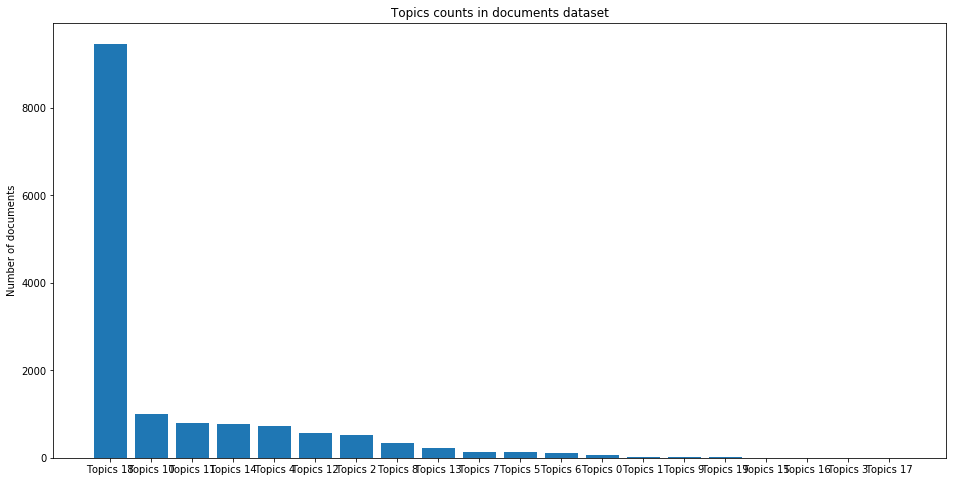

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
labels = ["Topics {}".format(i) for i in embedding['hue'].value_counts().index]
ax.bar(labels, embedding['hue'].value_counts())
ax.set_ylabel("Number of documents")
ax.set_title("Topics counts in documents dataset")

Text(0.5, 1.0, 't-SNE visualisation of documents main topics')

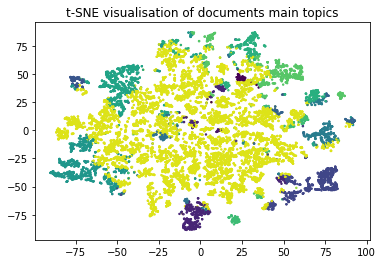

In [10]:
plt.scatter(x=embedding['x'], y=embedding['y'], c=embedding['hue'], s=2)
plt.title("t-SNE visualisation of documents main topics")